### Data model to predict the severity of covid using some symptoms

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# load dataset in pandas dataframe
df = pd.read_csv('covid.csv')
df.head(20)

,id,headache,lossOfSmell,musclePain,cough,soreThroat,chestPain,fever,hoarseness,lossOfAppetite,diarrhea,fatigue,confusion,shortnessOfBreath,AbdominalPain,level
0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1
1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,2
2,2,1,1,0,0,1,1,0,0,1,1,0,0,0,0,3
3,3,1,1,0,1,0,1,1,1,0,1,1,0,0,0,4
4,4,1,1,1,1,1,1,1,1,1,0,1,1,0,0,5
5,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6
6,6,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0
7,7,1,0,1,0,0,1,0,0,0,0,0,1,1,1,0
8,8,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
9,9,1,1,0,0,1,1,0,0,1,1,1,0,1,1,0


In [5]:
# get information on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   id                 200000 non-null  int64
 1   headache           200000 non-null  int64
 2   lossOfSmell        200000 non-null  int64
 3   musclePain         200000 non-null  int64
 4   cough              200000 non-null  int64
 5   soreThroat         200000 non-null  int64
 6   chestPain          200000 non-null  int64
 7   fever              200000 non-null  int64
 8   hoarseness         200000 non-null  int64
 9   lossOfAppetite     200000 non-null  int64
 10  diarrhea           200000 non-null  int64
 11  fatigue            200000 non-null  int64
 12  confusion          200000 non-null  int64
 13  shortnessOfBreath  200000 non-null  int64
 14  AbdominalPain      200000 non-null  int64
 15  level              200000 non-null  int64
dtypes: int64(16)
memory usage: 24.4 MB


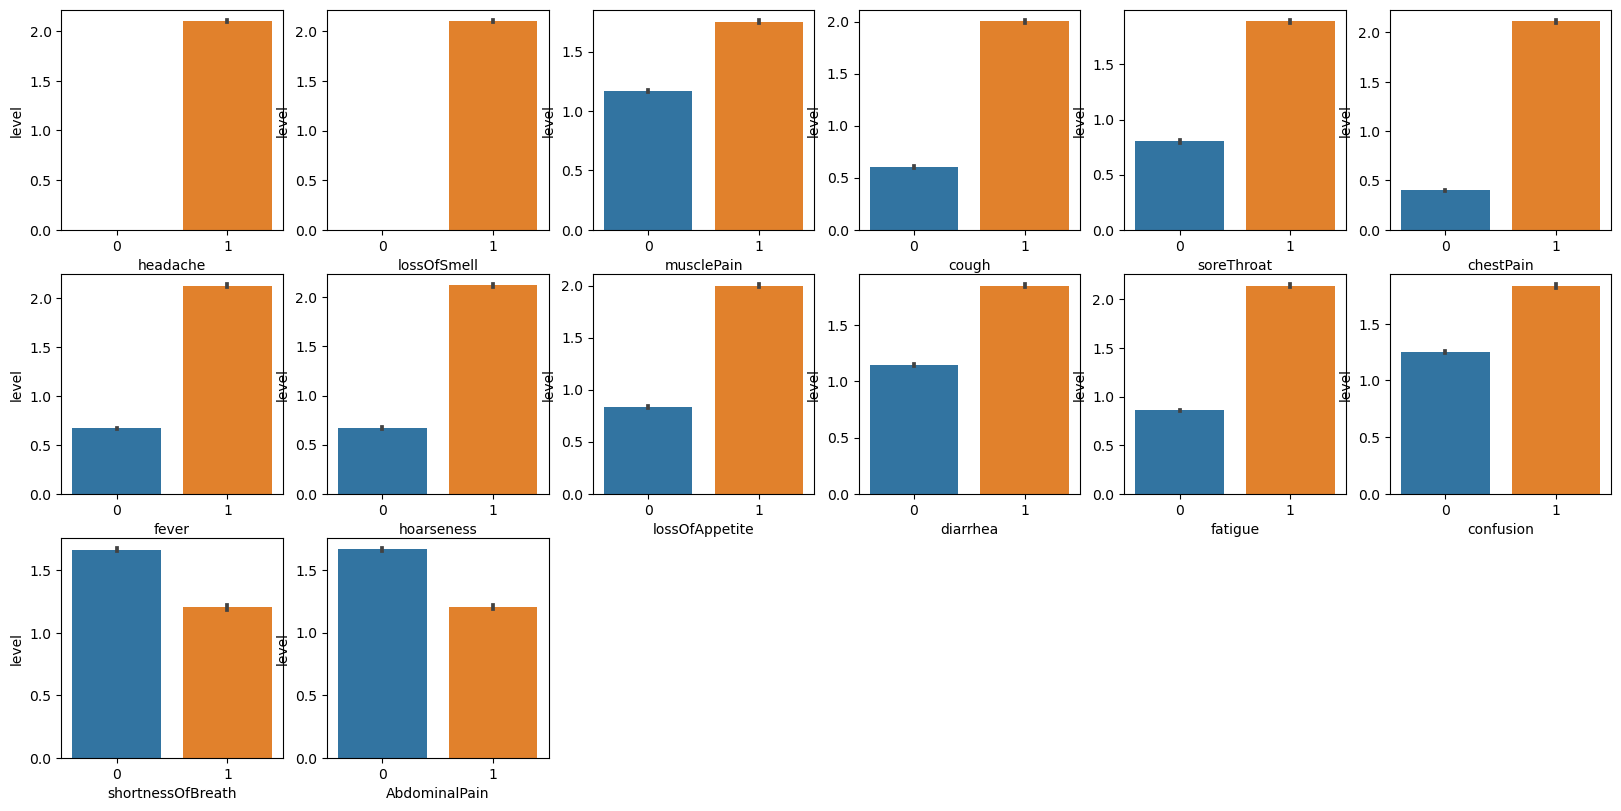

In [10]:
# plot to compare each symptom to severity
plt.figure(figsize=(20,20))
for i,feat in enumerate([
    'headache','lossOfSmell','musclePain',
    'cough','soreThroat','chestPain','fever',
    'hoarseness','lossOfAppetite','diarrhea',
    'fatigue','confusion','shortnessOfBreath',
    'AbdominalPain'
    ]):
    plt.subplot(6,6,i+1)
    sns.barplot(x=df[feat],y=df.level)
plt.show()

In [12]:
# observe that 'shortnessOfBreath' and 'AbdominalPain' are not correlating well with the levels
# dropped them
X = df.drop(['shortnessOfBreath', 'AbdominalPain', 'level'], axis=1)
y = df['level']
print(X.columns)

Index(['id', 'headache', 'lossOfSmell', 'musclePain', 'cough', 'soreThroat',
       'chestPain', 'fever', 'hoarseness', 'lossOfAppetite', 'diarrhea',
       'fatigue', 'confusion'],
      dtype='object')


In [14]:
# split data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [15]:
# use standard scalar for feature engineering
from sklearn.preprocessing import StandardScaler
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# use 'random forest' for training
from sklearn.ensemble import RandomForestRegressor
cls = RandomForestRegressor()

In [17]:
# fit the model
cls.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
# check accuracy
cls.score(X_test, y_test)

0.9961004893948572